## 张量

In [109]:
import torch
import torch.nn as nn
from torchvision.transforms import Compose

nn.Linear(in_features=10,out_features=10)

### 张量的数据类型

如何查看和设置张量的数据类型: 

In [110]:
import torch
## 获取张量的数据类型
torch.tensor([1.2, 3.4]).dtype

torch.float32

In [111]:
## 将张量的默认数据类型设置为其他类型
torch.set_default_tensor_type(torch.DoubleTensor)
torch.tensor([1.2, 3.4]).dtype

torch.float64

In [112]:
## 将张量数据类型转化为整形
a = torch.tensor([1.2, 3.4])
print("a.dtype:",a.dtype)
print("a.long()方法:", a.long().dtype)
print("a.int()method:", a.int().dtype)
print("a.float()method:", a.float().dtype)


a.dtype: torch.float64
a.long()方法: torch.int64
a.int()method: torch.int32
a.float()method: torch.float32


In [113]:
## restore the default data type of torch
torch.set_default_tensor_type(torch.FloatTensor)
torch.tensor([1.2, 3.4]).dtype

torch.float32

In [114]:
## another way to get the default data type
torch.get_default_dtype()

torch.float32

### 张量的生成

（1）使用torch.tensor()函数生成张量

In [115]:
A = torch.tensor([[1.0,1.0],[2,2]])
A

tensor([[1., 1.],
        [2., 2.]])

In [116]:
print(A)

tensor([[1., 1.],
        [2., 2.]])


上面的程序使用torch.tensor()函数将python的列表转化为张量。

In [117]:
## 获取张量的维度
A.shape

torch.Size([2, 2])

In [118]:
## 获取张量的形状大小
A.size()

torch.Size([2, 2])

In [119]:
## 计算张量中包含元素的数量
A.numel()

4

在使用torch.tensor()函数时，可以使用参数dtype来指定张量的数据类型，使用参数requires_grad来指定张量是否需要计算梯度。
只有就散了梯度的向量才能在深度深度网络优化时根据梯度大小进行更新。

In [120]:
## 生成一个需要计算梯度的张量B
B = torch.tensor((1,2,3),dtype=torch.float32,requires_grad=True)
B

tensor([1., 2., 3.], requires_grad=True)

In [121]:
## 因为张量B是可计算梯度的，故可以计算sum(B**2)的梯度
y = B.pow(2).sum()
y.backward()
B.grad

tensor([2., 4., 6.])

从输出结果可以看出每个位置上的梯度为2×B。需要注意的是，只有浮点型数据才能计算梯度，其他类型的数据不能计算张量的梯度。

（2）torch.Tensor()函数

In [122]:
## 根据已有数据创建张量
C = torch.Tensor([1,2,3,4])
C

tensor([1., 2., 3., 4.])

In [123]:
## 创建具有特定大小的张量
D = torch.Tensor(2,3)
D

tensor([[0.0000, 1.8750, 0.0000],
        [1.8750, 0.0000, 2.0000]])

针对已经生成的张量可以使用torch.**like()系列函数生成与指定张量维度相同、性质相似的张量

In [124]:
## 创建一个与D相同大小和类型的全1张量
torch.ones_like(D)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [125]:
## 生成与D维度相同的全0张量
torch.zeros_like(D)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [126]:
## 生成与D维度相同的随机张量
torch.rand_like(D)

tensor([[0.3821, 0.6605, 0.8536],
        [0.5932, 0.6367, 0.9826]])

针对一个创建好的张量D，可以使用D.new_**()系列函数创建出新的张量

In [127]:
## 创建一个类型相似但尺寸不同的张量
## 将列表E转化为32位浮点型的张量
E = [[1,2],[3,3]]
E = D.new_tensor(E)
print("D.dtype :",D.dtype)
print("E.dtype :",E.dtype)

D.dtype : torch.float32
E.dtype : torch.float32


（3）张量和NumPy数据相互转换
PyTorch提供了Numpy数组和PyTorch张量相互转换的函数，非常方便对张量进行相关操作。

In [128]:
## 利用Numpy数组生成张量
import numpy as np
F = np.ones((3,3))

## 使用torch.as_tensor()函数
Ftensor = torch.as_tensor(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [129]:
## 使用torch.from_numpy()函数
Ftensor = torch.from_numpy(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

上面得到的张量是64位浮点型数据，这是因为使用Numpy生成的数组默认是64位浮点型数组。

In [130]:
## 使用张量的.numpy()将张量转化为Numpy数组
Ftensor.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

(4)随机数生成向量
在PyTorch中还可以通过相关随机数来生成张量。在生成随机数前，可以使用torch.manual_seed()函数，指定生成随机数的种子，用于保证生成的随机数是可重复出现的。

In [131]:
## 通过指定均值和标准差生成随机数
## 通过mean指定随机数的均值，std指定随机数的标准差
torch.manual_seed(123)
A = torch.normal(mean = 0.0,std = torch.tensor(1.0))
A

tensor(-0.1115)

In [132]:
## 每个随机数服从的分布均值是0，但是他们分布的标准差分别为1、2、3、4
torch.manual_seed(123)
A = torch.normal(mean = 0.0,std=torch.arange(1,5.0))
A

tensor([-0.1115,  0.2407, -1.1089, -0.9617])

In [133]:
## 分别制定每个随机数服从的均值和标准差
torch.manual_seed(123)
A = torch.normal(mean = torch.arange(1,5.0),std=torch.arange(1,5.0))
A

tensor([0.8885, 2.2407, 1.8911, 3.0383])

也可以使用torch.rand()函数，在区间[0,1]上服从均匀分布的张量：

In [134]:
torch.manual_seed(123)
B = torch.rand(3,4)
B

tensor([[0.2961, 0.5166, 0.2517, 0.6886],
        [0.0740, 0.8665, 0.1366, 0.1025],
        [0.1841, 0.7264, 0.3153, 0.6871]])

而torch.rand_like()函数则可以生成与其他张量维度相同的随机数张量，例如：

In [135]:
torch.manual_seed(123)
C = torch.ones(2,3)
D = torch.rand_like(C)
D

tensor([[0.2961, 0.5166, 0.2517],
        [0.6886, 0.0740, 0.8665]])

使用torch.randn()和torch.rand_like()函数则可生成服从标准正态分布的随机数张量，例如：

In [136]:
print(torch.randn(3,3))
print(torch.randn_like(C))

tensor([[ 0.9447,  0.6217, -1.3501],
        [-0.1881, -2.3891, -0.4759],
        [ 1.7603,  0.6547,  0.5490]])
tensor([[ 0.3671,  0.1219,  0.6466],
        [-1.4168,  0.8429, -0.6307]])


使用torch.randperm(n)函数，则可将0-n（包含0不包含n）之间的整数进行随机排序后输出，例如将0-9这10个数字随机排序后输出：

In [137]:
torch.manual_seed(123)
torch.randperm(10)

tensor([2, 0, 8, 1, 3, 7, 4, 9, 5, 6])

(5)其他生成张量的函数

在PyTorch中包含和np.arange()用法相似的函数torch.arange(),常用来生成张量，例如：

In [138]:
torch.arange(start=0, end = 10, step=2)

tensor([0, 2, 4, 6, 8])

可使用torch.linspace()函数在范围内生成固定数量的等间隔张量，例如：

In [139]:
torch.linspace(start = 1, end = 10, steps=5)

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

torch.logspace()函数则可生成对数为间隔的张量，例如：

In [140]:
torch.logspace(start = 0.1, end=1.0, steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

常用的生成张量系列函数：

| 函数                              | 描述                  |
| --------------------------------- | --------------------- |
| torch.zeros(3,3)                  | 3×3的全0张量          |
| torch.ones(3,3)                   | 3×3的全1张量          |
| torch.full((3,3),fill_value=0.25) | 3×3使用0.25填充的张量 |
| torch.empty(3,3)                  | 3×3的空张量           |
| torch.eye(3)                      | 3×3的单位张量         |

### 张量操作

（1）张量的形状 

改变张量的形状在深度学习的使用过程中会经常遇到，而且针对不同的情况对张量的形状尺寸的改变有多种函数和方法可以使用。

In [141]:
## 使用tensor.reshape()方法设置张量的形状大小
A = torch.arange(12.0).reshape(3,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

上面的程序针对一个生成的张量，利用.reshape()方法修改张量。除此之外还可以直接通过torch.reshape()修改输入张量的形状。

In [142]:
## 使用torch.reshape()
torch.reshape(input = A,shape = (2,-1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

改变张量的形状使用tensor.resize_()方法，针对输入的形状大小对张量形状进行修改

In [143]:
## using resize_()
A.resize_(2,6)
A

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

在PyTorch中提供了A.resize_as_(B)方法，可以将张量A的形状尺寸修改为与B相同

In [144]:
B = torch.arange(10.0,19.0).reshape(3,3)
A.resize_as_(B)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [145]:
B

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

在PyTorch中，torch.unsqueeze()函数可以在张量的指定维度插入新的维度得到维度提升的张量，而torch.squeeze()函数，可以移除指定或者所有维度大小为1的维度，从而得到维度减小的新张量。

In [146]:
## torch.unsqueeze()函数在指定维度插入尺寸为1的新张量
A = torch.arange(12.0).reshape(2,6)
B = torch.unsqueeze(A,dim = 0)
B.shape

torch.Size([1, 2, 6])

In [147]:
## torch.squeeze()函数移除所有维度为1的维度
C = B.unsqueeze(dim = 3)
print("C.shape : ",C.shape)
D = torch.squeeze(C)
print("D.shape : ",D.shape)

## 移除指定维度为1的维度
E = torch.squeeze(C,dim = 0)
print("E.shape : ",E.shape)

C.shape :  torch.Size([1, 2, 6, 1])
D.shape :  torch.Size([2, 6])
E.shape :  torch.Size([2, 6, 1])


在PyTorch中也可以使用.expand()方法对张量的维度进行拓展，从而修改张量的形状大小。
而A.expand_as(C)方法则会将张量A根据张量C的形状大小进行拓展，得到新的张量。

In [148]:
## using .expand() to expand tensor
A = torch.arange(3)
B = A.expand(3,-1)
B

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

In [149]:
## using .expand_as() to expand tensor
C = torch.arange(6).reshape(2,3)
B = A.expand_as(C)
B

tensor([[0, 1, 2],
        [0, 1, 2]])

使用张量的.repeat()方法可以讲张量看做一个整体，然后根据制定的形状进行重复填充，得到新的张量。

In [150]:
## usign .repeat() to expand tensor
D = B.repeat(1,2,2)
print(D)
print(B.shape)
print(D.shape)

tensor([[[0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2]]])
torch.Size([2, 3])
torch.Size([1, 4, 6])


（2）获取张量中的元素
从已知的张量总提取需要的元素，在实际应用中也很常见。从张量中利用切片和索引提取元素的方法，和在Numpy的使用方法是一致的，所以使用时非常方便。

In [151]:
## get elements in the tensor using slice and index
A = torch.arange(12).reshape(1,3,4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

In [152]:
A[0]

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [153]:
## 获取第0维度下的矩阵前两行元素
A[0,0:2,]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [154]:
## 获取第0维度下的矩阵，最后一行-4 ~ -1列
A[0,-1,-4:-1]

tensor([ 8,  9, 10])

也可以按需将索引设置为相应的布尔值，然后提取真条件下的内容，例如找到A中取指大于5的元素：

In [155]:
## 根据条件筛选
B = -A
torch.where(A>5,A,B) ## 当A>5为真时返回A对应的值，为假时返回B对应值

tensor([[[ 0, -1, -2, -3],
         [-4, -5,  6,  7],
         [ 8,  9, 10, 11]]])

In [156]:
## 获取A中大于5的元素
A[A > 5]

tensor([ 6,  7,  8,  9, 10, 11])

torch.tril()函数可以获取张量下三角部分的内容，而将上三角的元素设置为0;torch.triu()函数可以获取上三角部分的内容，而将下三角部分的元素设置为0；torch.diag()函数可以获取矩阵张量的对角线元素，或者体用一个向量生成一个矩阵张量。

In [157]:
## 获取矩阵张量的下三角部分
torch.tril(A,diagonal=0,)

tensor([[[ 0,  0,  0,  0],
         [ 4,  5,  0,  0],
         [ 8,  9, 10,  0]]])

In [158]:
## diagonal参数控制考虑的对角线
torch.tril(A,diagonal=1)

tensor([[[ 0,  1,  0,  0],
         [ 4,  5,  6,  0],
         [ 8,  9, 10, 11]]])

In [159]:
## 获取矩阵张量的上三角部分
torch.triu(A,diagonal=0)

tensor([[[ 0,  1,  2,  3],
         [ 0,  5,  6,  7],
         [ 0,  0, 10, 11]]])

In [160]:
## 获取矩阵张量的对角线元素，input需要是一个二维的张量
C = A.reshape(3,4)
print(C)
print(torch.diag(C,diagonal=0))
print(torch.diag(C,diagonal=1))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 0,  5, 10])
tensor([ 1,  6, 11])


在上面的程序中可以通过diagoal参数来控制获取的对角线元素，相对于对角线的位移。

In [161]:
## 提供对角线元素生成矩阵张量
torch.diag(torch.tensor([1,2,3]))

tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])

（3）拼接和拆分
PyTorch还提供了将多个张量拼接为一个张量、将一个大的张量拆分为几个小的张量的函数。其中torch.cat()函数可以将多个张量在指定的维度进行拼接，得到新的张量

In [162]:
## 在给定维度中连接给定的张量序列
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(0,10,6).reshape(2,3)
## 在0维度连接张量
C = torch.cat((A,B),dim=0)
C

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [163]:
## 在1维度连接向量
D = torch.cat((A,B),dim=1)
D

tensor([[ 0.,  1.,  2.,  0.,  2.,  4.],
        [ 3.,  4.,  5.,  6.,  8., 10.]])

In [164]:
## 在1维度连接3个张量
E = torch.cat((A[:,1:2],A,B),dim=1)
E

tensor([[ 1.,  0.,  1.,  2.,  0.,  2.,  4.],
        [ 4.,  3.,  4.,  5.,  6.,  8., 10.]])

PyTorch中的torch.stack()函数也可以讲多个张量按照指定的维度进行拼接

In [165]:
## 沿新维度连接向量
F = torch.stack((A,B),dim=0)
print(F)
print(F.shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]])
torch.Size([2, 2, 3])


In [166]:
G = torch.stack((A,B),dim=2)
print(G)
print(G.shape)

tensor([[[ 0.,  0.],
         [ 1.,  2.],
         [ 2.,  4.]],

        [[ 3.,  6.],
         [ 4.,  8.],
         [ 5., 10.]]])
torch.Size([2, 3, 2])


torch.chunk()函数可以将张量分割为特定数量的块；torch.split()函数在将张量分割为特定数量的块时，可以指定每个块的大小

In [167]:
## 在行上将张量E分为两块
torch.chunk(E,2,dim=1)

(tensor([[1., 0., 1., 2.],
         [4., 3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [168]:
D1,D2 = torch.chunk(D,2,dim=1)
print(D1)
print(D2)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


In [169]:
## 如果沿给定维度dim的张量大小不能被块整除，则最后一个块将最小
E1,E2,E3 = torch.chunk(E,3,dim=1)
print(E1)
print(E2)
print(E3)

tensor([[1., 0., 1.],
        [4., 3., 4.]])
tensor([[2., 0., 2.],
        [5., 6., 8.]])
tensor([[ 4.],
        [10.]])


In [170]:
## 将张量切分为块，指定每个块的大小
D1,D2,D3 = torch.split(D,[1,2,3],dim=1)
print(D1)
print(D2)
print(D3)

tensor([[0.],
        [3.]])
tensor([[1., 2.],
        [4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


### 张量计算

针对张量计算的内容，主要包括张量之间的大小比较、张量的基本运算、张量与统计相关的运算。

（1）比较大小

In [171]:
## 比较两个数是否接近
A = torch.tensor([10.0])
B = torch.tensor([10.1])
print(torch.allclose(A,B, rtol=1e-05, atol=1e-08, equal_nan=False))
print(torch.allclose(A,B, rtol=0.1, atol=0.01, equal_nan=False))

False
True


从输出结果可以发现，在不同的参数条件下会给出不同的结果。

In [172]:
## 如果equal_nan=True，那么缺失值可以判断接近
A = torch.tensor(float("nan"))
print(torch.allclose(A,A, equal_nan=False))
print(torch.allclose(A,A, equal_nan=True))

False
True


torch.eq()函数用来判断两个元素是否相等；torch.equal()函数可以判断两个张量是否具有相同的形状和元素。

In [173]:
## 计算元素是否相等
A = torch.tensor([1,2,3,4,5,6])
B = torch.arange(1,7)
C = torch.unsqueeze(B,dim=0)
print(torch.eq(A,B))
print(torch.eq(A,C))
## 判断两个张量是否具有相同的形状和元素
print(torch.equal(A,B))
print(torch.equal(A,C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])
True
False


torch.ge()函数是逐元素比较是否大于等于；torch.gt()函数是逐元素比较大于

In [174]:
## 逐元素比较大于等于
print(torch.ge(A,B))
print(torch.ge(A,C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [175]:
## 逐元素比较小于
print(torch.gt(A,B))
print(torch.gt(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


torch.le()函数是逐元素比较是否小于等于；torch.lt()函数是逐元素比较小于

torch.ne()函数是逐元素比较不等于；torch.isnan()函数用来判断是否为缺失值

In [176]:
## 判断是否为缺失值
torch.isnan(torch.tensor([0,1,float("nan"),2]))

tensor([False, False,  True, False])

（2）基本运算

张量的基本运算方式，一种为逐元素之间的运算，如加减乘除、幂运算、平方根、对数等；另一种为矩阵之间的运算，如矩阵相乘、矩阵的转置等。

In [177]:
## 矩阵逐元素相乘
A =torch.arange(6.0).reshape(2,3)
B = torch.linspace(10,20,steps=6).reshape(2,3)
print("A:",A)
print("B:",B)
print(A * B)
## 逐元素相除
print(A / B)

A: tensor([[0., 1., 2.],
        [3., 4., 5.]])
B: tensor([[10., 12., 14.],
        [16., 18., 20.]])
tensor([[  0.,  12.,  28.],
        [ 48.,  72., 100.]])
tensor([[0.0000, 0.0833, 0.1429],
        [0.1875, 0.2222, 0.2500]])


In [178]:
## 逐元素相加
print(A + B)
## 逐元素相减
print(A - B)
## 逐元素整除
print(B//A)

tensor([[10., 13., 16.],
        [19., 22., 25.]])
tensor([[-10., -11., -12.],
        [-13., -14., -15.]])
tensor([[inf, 12.,  7.],
        [ 5.,  4.,  4.]])


/var/folders/0b/gzxsb2qj1570ktpd81lr27zw0000gn/T/ipykernel_22276/1494973912.py:6: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  print(B//A)


In [179]:
## 计算张量的幂可以使用torch.pow()函数，或者**运算符号
print(torch.pow(A,3))
print(A ** 3)

tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])
tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])


计算张量的指数可以使用torch.exp()函数，计算张量的对数可以使用torch.log()函数，计算平方根可以使用torch.sqrt()函数，计算张量的平方根倒数可以使用torch.rsqrt()函数

针对张量数据的裁剪，有根据最大值裁剪torch,clamp_max()，有根据最小值裁剪torch.clamp_min()，还有根据范围裁剪torch.clamp()

In [180]:
## 根据最大值裁剪
torch.clamp_max(A,4)

tensor([[0., 1., 2.],
        [3., 4., 4.]])

In [181]:
## 根据最小值裁剪
torch.clamp_min(A,3)

tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [182]:
## 根据范围裁剪
torch.clamp(A,2,5.4)

tensor([[2., 2., 2.],
        [3., 4., 5.]])

前面介绍的都是张量中逐元素进行计算的方式，对于张量矩阵的运算函数如下：

In [183]:
## 矩阵的转置
C = torch.t(A)
C

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])

In [184]:
## 矩阵运算，矩阵相乘。A的行数要等于C的列数
A.matmul(C)

tensor([[ 5., 14.],
        [14., 50.]])

In [185]:
A = torch.arange(12.0).reshape(2,2,3)
B = torch.arange(12.0).reshape(2,3,2)
AB = torch.matmul(A,B)
AB

tensor([[[ 10.,  13.],
         [ 28.,  40.]],

        [[172., 193.],
         [244., 274.]]])

In [186]:
## 矩阵相乘只计算最后面的两个维度的惩罚
print(AB[0].eq(torch.matmul(A[0],B[0])))
print(AB[1].eq(torch.matmul(A[1],B[1])))

tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])


若A和B互为逆矩阵，计算矩阵的逆矩阵使用torch.inverse()函数；一个方阵中，对角线元素的和称为矩阵的迹，可以使用torch.trace()计算得到

In [187]:
## 计算矩阵的逆
C = torch.rand(3,3)
D = torch.inverse(C)
torch.mm(C,D)

tensor([[ 1.0000e+00,  2.9802e-08, -1.1921e-07],
        [ 2.9802e-08,  1.0000e+00, -5.9605e-08],
        [ 0.0000e+00,  5.9605e-08,  1.0000e+00]])

In [188]:
## 计算矩阵的迹
torch.trace(torch.arange(9.0).reshape(3,3))

tensor(12.)

（3）统计相关的计算

     pytorch中包含了一些基础的统计计算功能，可以方便地获取张量中的均值、标准差、最大值、最小值及位置等。
     torch.max()可以张量中的最大值
     torch.argmax()输出最大值所在的位置
     torch.argmin()输出最小值所在的位置

In [189]:
## 一维张量的最大值
A = torch.tensor([12.,34,25,11,67,32,29,30,99,55,23,44])
## 最大值及位置
print("max num:",A.max())
print("max num position:",A.argmax())

max num: tensor(99.)
max num position: tensor(8)


In [190]:
## 二维张量的最大值
B = A.reshape(3,4)
## 最大值及位置（每行）
print("max num:",B.max(dim=1))
print("max num postion",B.argmax(dim=1))

max num: torch.return_types.max(
values=tensor([34., 67., 99.]),
indices=tensor([1, 0, 0]))
max num postion tensor([1, 0, 0])


torch.sort()可以对一维张量进行排序，或者对高维张量在指定的维度进行排序，在输出排序结果的同时，还会输出对应的值在原始位置的索引。

In [191]:
## 张量排序，分别输出从小到大的排序结果和相应元素在原始位置的索引
torch.sort(A)

torch.return_types.sort(
values=tensor([11., 12., 23., 25., 29., 30., 32., 34., 44., 55., 67., 99.]),
indices=tensor([ 3,  0, 10,  2,  6,  7,  5,  1, 11,  9,  4,  8]))

In [192]:
## 按照降序排列
torch.sort(A,descending=True)

torch.return_types.sort(
values=tensor([99., 67., 55., 44., 34., 32., 30., 29., 25., 23., 12., 11.]),
indices=tensor([ 8,  4,  9, 11,  1,  5,  7,  6,  2, 10,  0,  3]))

In [193]:
## 对2-D张量进行排序
Bsort, Bsort_id=torch.sort(B)
print("B sort:\n",Bsort)
print("B sort index:\n",Bsort_id)
print("B argsort:\n",torch.argsort(B))

B sort:
 tensor([[11., 12., 25., 34.],
        [29., 30., 32., 67.],
        [23., 44., 55., 99.]])
B sort index:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])
B argsort:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])


torch.topk()根据指定的k值，计算张量中取指大小为前k大的数值与数值所在的位置。
torch,kthvalue()根据指定的k值，计算张量大小为第k小的数值与数值所在的位置。

In [194]:
## 获取张量前几个大的数值
torch.topk(A,3)

torch.return_types.topk(
values=tensor([99., 67., 55.]),
indices=tensor([8, 4, 9]))

In [195]:
## 获取2-D张量每列前几个大的数值
Btop2,Btop2_id = torch.topk(B,2,dim=1)
print(Btop2)
print(Btop2_id)

tensor([[34., 25.],
        [67., 32.],
        [99., 55.]])
tensor([[1, 2],
        [0, 1],
        [0, 1]])


In [196]:
## 获取张量第k小的数值和位置
torch.kthvalue(A,3)

torch.return_types.kthvalue(
values=tensor(23.),
indices=tensor(10))

In [197]:
## 获取2-D张量第k小的数值和位置
torch.kthvalue(B,2,dim=1)

torch.return_types.kthvalue(
values=tensor([12., 30., 44.]),
indices=tensor([0, 3, 3]))

In [198]:
Bkth,Bkth_id = torch.kthvalue(B,2,dim = 1,keepdim=True)
Bkth

tensor([[12.],
        [30.],
        [44.]])

torch.mean()根据指定的维度计算均值
torch.sum()根据指定的维度求和
torch.cumsum()根据指定的维度计算累加和
torch.median()根据指定的维度计算中位数
torch.cumprod()根据指定的维度计算累乘积
torch.std()计算张量的标准差

In [199]:
## 计算每行的平均值
print(torch.mean(B,dim = 1,keepdim = True))
## 计算每列的平均值
print(torch.mean(B,dim = 0,keepdim = True))

tensor([[20.5000],
        [39.5000],
        [55.2500]])
tensor([[59.3333, 40.3333, 25.6667, 28.3333]])


In [200]:
## 计算每行的和
print(torch.sum(B,dim=1,keepdim=True))

tensor([[ 82.],
        [158.],
        [221.]])


In [201]:
## 计算每列的和
print(torch.sum(B,dim=0,keepdim=True))

tensor([[178., 121.,  77.,  85.]])


In [202]:
## 按照行计算累加和
print(torch.cumsum(B,dim = 1))

tensor([[ 12.,  46.,  71.,  82.],
        [ 67.,  99., 128., 158.],
        [ 99., 154., 177., 221.]])


In [203]:
## 按照列计算累加和
print(torch.cumsum(B,dim = 0))

tensor([[ 12.,  34.,  25.,  11.],
        [ 79.,  66.,  54.,  41.],
        [178., 121.,  77.,  85.]])


In [204]:
## 计算每行的中位数
print(torch.median(B,dim = 1,keepdim = True))
## 计算每列的中位数
print(torch.median(B,dim = 0,keepdim = True))

torch.return_types.median(
values=tensor([[12.],
        [30.],
        [44.]]),
indices=tensor([[0],
        [3],
        [3]]))
torch.return_types.median(
values=tensor([[67., 34., 25., 30.]]),
indices=tensor([[1, 0, 0, 1]]))


In [205]:
## 按照行计算乘积
print(torch.prod(B,dim = 1,keepdim=True))
## 按照列计算乘积
print(torch.prod(B,dim = 0,keepdim=True))

tensor([[ 112200.],
        [1865280.],
        [5510340.]])
tensor([[79596., 59840., 16675., 14520.]])


In [206]:
## 按照行计算累计乘
print(torch.cumprod(B,dim=1))

tensor([[1.2000e+01, 4.0800e+02, 1.0200e+04, 1.1220e+05],
        [6.7000e+01, 2.1440e+03, 6.2176e+04, 1.8653e+06],
        [9.9000e+01, 5.4450e+03, 1.2524e+05, 5.5103e+06]])


In [207]:
## 标准差
torch.std(A)

tensor(25.0108)

### PyTorch中的自动微分

在torch中的torch.autograd模块，提供了实现任意标量值函数自动求导的类和函数。针对一个张量只需要设置参数requires_grad=True，通过相关计算即可输出其在传播过程中的梯度（导数）信息。

下面使用一个实例来解释PyTorch中自动微分的计算，在PyTorch中生成一个矩阵张量x

In [208]:
x = torch.tensor([[1.0,2.0],[3.0,4.0]],requires_grad=True)
## 默认requieres_grad=False
y = torch.sum(x**2+2*x+1)
print("x.requires_grad:",x.requires_grad)
print("y.requires_grad:",y.requires_grad)
print("x:",x)
print("y:",y)

x.requires_grad: True
y.requires_grad: True
x: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
y: tensor(54., grad_fn=<SumBackward0>)


下面通过y.backward()来计算y在x的每个元素是上的导数

In [209]:
## 计算y在x上的梯度
y.backward()
x.grad

tensor([[ 4.,  6.],
        [ 8., 10.]])

在上面的程序中通过y.backward(0)即可自动计算出y在x的每个元素是上的导数，然后通过x的grad属性即可获取此时x的梯度信息，计算得到梯度值为2x+2.

### torch.nn模块

torch.nn模块包含torch已经准备好的层，方便使用者调用构建网络。下面介绍卷积层、池化层、激活函数层、循环层、全连接层的相关使用方法。

### 卷积层
卷积可以看做是输入和卷积核之间的内积运算，是两个实值函数之间的一种数学运算。

在卷积运算中，通常使用卷积核将输入数据进行卷积运算得到输出作为特征映射。

使用卷积运算在图像领域的应用有三个好处，即卷积稀疏连接、参数共享、等变表示。

1. 在卷积神经网络中，通过输入卷积核来进行卷积操作，使输入单元（图像或特征映射）和输出单元（特征映射）之间的连接是稀疏的，从而减少需要训练的参数数量，加快网络的计算速度。

2. 卷积操作的参数共享特点主要体现在同一组参数可以被多个函数或操作共同使用。在卷积神经网络中，针对不同的输入会利用同样的卷积核来获得相应的输出。这样可以使得只需要训练一个参数集，而不需要对每个位置学习一个参数集合。

3. 由于卷积核尺寸可以远小于输入尺寸，减少需要学习的参数的数量，并且针对每个卷积层可以使用多个卷积核获取输入的特征映射，对数据具有很强的特征提取和表示能力，并且在卷积运算之后，使得卷积神经网络对输入的图像具有平移不变的性质。

在PyTorch中针对卷积操作的对象和使用场景不同，有一维卷积、二维卷积、三维卷积、转置卷积（卷积操作的逆操作），他们都可以从torch.nn模块中调用。

常用的卷积操作所对应的类
1. 一维卷积：torch.nn.Conv1d()
2. 一维转置卷积：torch.nn.ConvTranspose1d()

In [210]:
## 以torch.nnConv2d()为例，介绍卷积在图像上的使用方法
torch.nn.Conv2d(in_channels,
               out_channels,
               kernel_size,
               stride=1,
               padding=0,
               dilation=1,
               groups=1,
               bias=True)

NameError: name 'in_channels' is not defined

主要参数说明：
in_channels:（整数）输入图像的通道数。

out_channels:（整数）经过卷积运算后，输出特征映射的数量。

kernel_size:（整数或数组）卷积核的大小

stride:（整数或者数组，正数）卷积的步长，默认为1

padding:（整数或者数组，正数）在输入两边进行0填充的数量，默认为0

dilation:（整数或者数组，正数）卷积核元素之间的步幅，该参数可调整空洞卷积核的空洞大小，默认为1

groups:（整数，正数）从输入通道到输出通道的阻塞连接数

bias:（布尔值，正数）如果bias=True，则添加偏置，默认为True

下面使用一张图像来展示经过卷积后，输出的特征映射的结果。使用PIL包读取图像数据，使用matplotlib包来可视化图像和卷积后的结果

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
## 读取图像->转化为灰度图片->转化为Numpy数组
myim = Image.open("1.png") ## 获取图像数据
myimgray = np.array(myim.convert("L"),dtype=np.float32) ## 转化为灰度图像
## 可视化图片
plt.figure(figsize=(6,6))
plt.imshow(myimgray,cmap=plt.cm.gray) ## 将图像可视化
plt.axis("off")
plt.show()

经过上述操作的到一个512×512的数组，在使用PyTorch进行卷积操作之前，需要将其转化为1×1×512×512的张量

In [ ]:
## 将数组转化为张量
imh,imw = myimgray.shape
print(imh,imw)
myimgray_t = torch.from_numpy(myimgray.reshape((1,1,imh,imw)))
myimgray_t.shape

卷积时需要将图像转化为四维来表示[batch,channel,h,w]。在图像进行卷积操作之后，获得两个特征映射。第一个特征映射使用图像轮廓提取卷积核获取，第二个使用的卷积核为随机数，卷积核大小为5×5，对图像的边缘不使用0填充，所以卷积后输出特征映射的尺寸为508×508.

使用下面的程序进行卷积运算，并对卷积后的两个特征映射进行可视化

In [ ]:
## 对灰度图像进行卷积提取图像轮廓
kersize = 5 ## 定义边缘检测卷积核，并将维度处理为1*1*5*5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[2,2] = 24
ker = ker.reshape((1,1,kersize,kersize))
## 进行卷积操作
conv2d = nn.Conv2d(1,2,(kersize,kersize),bias = False)

## 设置卷积时使用的核，第一个核使用边缘检测核
conv2d.weight.data[0] = ker

## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)

## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后尺寸：",imconv2dout_im.shape)

## 可视化卷积后的图像
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(imconv2dout_im[1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

### 池化层
池化操作的一个重要目的是进一步处理卷积后得到的特征（主要是降维），起到对数据进一步浓缩的效果，从而缓解计算时的压力。

池化会选择一定大小的区域，并将该区域内的像素值使用一个代表元素表示。如果使用平均值，则称为平均值池化，如果使用最大值则称为最大值池化。

In [ ]:
## torch.nn.MaxPool2d()池化操作相关参数的应用
torch.nn.MaxPool2d(kernel_size,
                  stride=None,
                  padding=0,
                  dilation=1,
                  return_indices=False,
                  ceil_mode=False)

kernel_size:最大值池化的窗口大小

stride:最大值池化窗口移动的步长，默认值是kernel_size

padding:输入的每一条边补充0的层数

dilation:控制窗口中元素步幅的参数

return_indices:如果为True，则会返回输出最大值的索引，便于之后的torch.nn.MaxUnpool2d操作

ceil_mode:如果等于True，计算输出信号大小的时候，会使用向上取整，默认为向下取整

In [ ]:
## 对卷积后的结果进行最大值池化
maxpool2 = nn.MaxPool2d(2,stride=2)
pool2_out = maxpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

经过上面的程序发现，原始的特征映射经过窗口为2*2，步长为2的最大值池化后，特征映射的尺寸减少了

In [ ]:
## 可视化最大值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show

In [ ]:
## 使用nn.AvgPool2d()函数，对卷积后的输出进行平均值池化
avgpool2 = nn.AvgPool2d(2,stride=2)
pool2_out = avgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

In [ ]:
## 可视化平均值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show

In [ ]:
## 对卷积后的结果进行自适应平均值池化
AdaAvgpool2 = nn.AdaptiveAvgPool2d(output_size = (100,100))
pool2_out = AdaAvgpool2(imconv2dout)
pool2_outim=pool2_out.squeeze()
pool2_out.shape

In [ ]:
## 可视化自适应平均值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

从结果来看，池化后的特征映射尺寸变小，图像变得更加模糊

### 激活函数

常用的激活函数通常为S型(Sigmoid)激活函数、双曲正切(Tanh)激活函数、线性修正单元(ReLU)激活函数等。

torch.nn.Sigmoid()对应的是Sigmoid激活函数，也叫logistic激活函数，计算方式为
$f(x)=\frac{1}{1+e^{-x}}$

其值域为(0,1)。该函数在神经网络早期是很常用的激活函数，但是当输入远离坐标原点时，函数的梯度变得很小，几乎为零，所以会影响参数的更新速度。

torch.nn.Tanh()对应双曲正切函数，计算公式为$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

其值域是(-1,1)整个函数以0为中心，虽然Tanh函数和Sigmoid函数一样在输入很大或很小时，梯度很小，不利于权重更新，但由于Tanh的取值输出以0位对称，使用效果会比Sigmoid好很多。

torch.nn.ReLU()对应ReLU函数，又称修正线性单元，计算方式为$f(x)=max(0,x)$

ReLU函数只保留大于0的输出，其他输出则会设置为0。在输入正数的时候不存在梯度饱和的问题。其计算速度相比于其他类型激活函数要快很多，而且该激活函数只有线性关系，所以不关前向传播还是反向传播速度都很快。

torch.nn.Softplus()对应平滑近似ReLU的激活函数，其计算公式为$f(x)=\frac{1}{β}log(1+e^{βx})$

β默认为1。该函数对任意位置都可以求导，而且尽可能地保留了ReLU激活函数的优点。

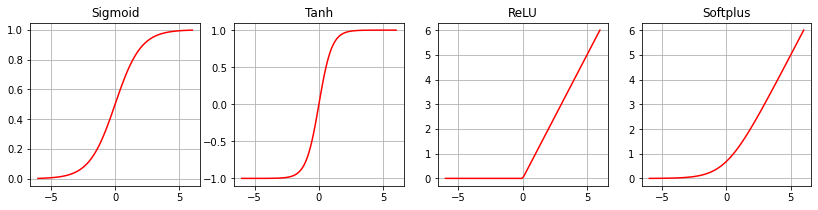

In [215]:
import matplotlib.pyplot as plt
# 使用PyTorch中的激活函数可视化上面介绍的几种激活函数
x = torch.linspace(-6,6,100)
sigmoid = nn.Sigmoid() # Sigmoid激活函数
ysigmoid = sigmoid(x)
tanh = nn.Tanh() # Tanh激活函数
ytanh = tanh(x)
relu = nn.ReLU() # ReLU激活函数
yrelu = relu(x)
softplus = nn.Softplus() # Softplus激活函数
ysoftplus = softplus(x)
plt.figure(figsize=(14,3)) # 可视化激活函数
plt.subplot(1,4,1)
plt.plot(x.data.numpy(),ysigmoid.data.numpy(),"r-")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1,4,2)
plt.plot(x.data.numpy(),ytanh.data.numpy(),"r-")
plt.title("Tanh")
plt.grid()
plt.subplot(1,4,3)
plt.plot(x.data.numpy(),yrelu.data.numpy(),"r-")
plt.title("ReLU")
plt.grid()
plt.subplot(1,4,4)
plt.plot(x.data.numpy(),ysoftplus.data.numpy(),"r-")
plt.title("Softplus")
plt.grid()
plt.show()

### 循环层
在PyTorch中，提供了三种循环层的实现：
1. torch.nn.RNN() 多层RNN单元
2. torch.nn.LSTM() 多层长短期记忆LSTM单元
3. torch.nn.GRU() 多层门限循环GRU单元

下面以torch.nn.RNN()为例，介绍循环层的参数、输入和输出：

参数说明：
input_size:输入x的特征数量

hidden_size:隐层的特征数量

num_layers:RNN网络的层数

nonlinearity:指定非线性函数使用tanh还是relu，默认为tanh

bias:如果是False,那么RNN层就不会使用偏置权重，默认为True

batch_first:如果是True,那么输入和输出的shape应该是[batch_sie,time_step,feature]

dropout:如果值非零，那么除了最后一层外，其他RNN层的输出都会套上一个dropout层，默认为0

bidirectional:如果是True,将会变成一个双向RNN，默认为False

RNN的输入为input和h_0,其中input是一个形状为(seq_len,batch,input_size)的张量。h_0则是一个形状为(num_layers*num_direcions,batch,hidden_size)保存着初始隐状态的张量，如果不提供就默认为0。如果是双向RNN，num_directions等于2，否则等于1.

RNN的输出为output和h_n，其中：

output是一个形状为(seq_len,batch,hidden_size*num_directions)的张量，保存着RNN最后一层的输出特征。如果输入是被填充过的序列，那么输出也是被填充过的序列。

h_n是一个形状为(num_layers*num_directions,batch,hidden_size)的张量，保存着最后一个时刻的隐状态

### 全连接层
通常说的全连接层是由多个神经元所组成的层，其所有的输出和该层的所有输入都有连接，即每一个输入都会影响所有神经元的输出。

在PyTorch中的nn.Linear()表示线性变换，全连接层可以看作是nn.Linear()表示线性变换层再加上一个激活函数层所构成的结构。

nn.Linear()全连接操作及相关参数如下：

torch.nn.Linear(in_features,out_feartures,bias=True)

参数说明：
1. in_features:每个输入样本的特征数量
2. out_features:每个输出样本的特征数量
3. bias: 若设置为False，则该层不会学习偏置

torch.nn.Linear()的输入为(N,in_features)的张量，输出为(N,out_features)的张量。

全连接层的应用十分广泛，只有全连接层组成的网络是全连接神经网络，可用于数据的分类或回归预测。卷积神经网络和循环神经网络的末端通常会由多个全连接层组成。

## PyTorch中数据操作和预处理
在PyTorch中torch.utils,data模块包含着一些常用的数据预处理的操作，主要用于数据的读取、切分、准备等。常用的函数如下表所示：

| 类                               | 功能                                       |
| -------------------------------- | ------------------------------------------ |
| torch.utils.data.TensorDataset() | 将数据处理为张量                           |
| torch.utils.data.ConcatDataset() | 连接多个数据集                             |
| torch.utils.data.Subset()        | 根据索引获取数据集的子集                   |
| torch.utils.data.DataLoader()    | 数据加载器                                 |
| torch.utils.data.random_split()  | 随机将数据集拆分为给定长度的非重叠新数据集 |

### 高维数组
在很多情况下，我们需要从文本中读取高维数组数据，这类数据的特征是每个样本都有很多个预测变量（特征）和一个被预测变量（目标标签），特征通常是数值变量或离散变量。
被预测变量如果是连续的数值，则对应着回归问题，如果是离散变量，则对应分类问题。在使用PyTorch建立模型对数据进行学习前，通常要对数据进行预处理，并将它们转化为网络需要的数据格式。

为了展示全连接神经网络模型，下面使用sklearn中提供的数据集load——boston和load_iris来进行回归和分类的数据准备。

1. 回归数据准备
首先加载相应的模块，然后读取数据

In [220]:
import torch
import torch.utils.data as Data
from sklearn.datasets import load_boston,load_iris
## 读取波士顿回归数据
boston_X,boston_y = load_boston(return_X_y=True)
print("boston_X.dtype:",boston_X.dtype)
print("train_yt.dtype:",boston_y.dtype)

boston_X.dtype: float64
train_yt.dtype: float64


从上面程序输出可以发现数据集的特征和被预测变量都是Numpy的64位浮点型数据，而PyTorch需要数据为torch的32位浮点型张量，故需要进行数据格式转换。

In [221]:
## 先将Numpy数据转化为32位浮点型，然后使用torch.from_numpy()函数，将数组转化为张量
train_xt = torch.from_numpy(boston_X.astype(np.float32))
train_yt = torch.from_numpy(boston_y.astype(np.float32))
print("train_xt.dtype:",train_xt.dtype)
print("train_yt.dtype:",train_yt.dtype)

train_xt.dtype: torch.float32
train_yt.dtype: torch.float32


在训练全连接神经网络时，通常一次使用一个batch的数据进行权重更新，torch.utils.data.DataLoader()函数可以将输入的数据集（包含数据特征张量和被预测变量张量）获得一个加载器，每次迭代可使用一个batch的数据，其使用方法如下：

In [222]:
## 使用TensorDataset将X和Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)

## 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset = train_data, ## 使用的数据集
    batch_size = 64, ## 批处理样本大小
    shuffle = True, ## 每次迭代前打乱数据
    num_workers = 1, ## 使用两个进程
)

## 检查训练数据集的一个batch的样本的维度是否正确
for step,(b_x,b_y) in enumerate(train_loader):
    if step > 0:
        break
        
## 输出训练图像的尺寸和标签的尺寸及数据类型
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y,dtype:",b_y.dtype)

b_x.shape: torch.Size([64, 13])
b_y.shape: torch.Size([64])
b_x.dtype: torch.float32
b_y,dtype: torch.float32


在上面的数据中，每64个样本为一个batch

2. 分类数据准备
分类数据和回归数据的不同点在于，分类数据的被预测变量为离散型变量，所以在使用PyTorch定义的网络模型时，默认的预测标签是64位有符号整形数据

In [236]:
## 处理分类数据
iris_x,irisy = load_iris(return_X_y=True)
print("iris_x.dtype:",iris_x.dtype)
print("irisy:",irisy.dtype)

iris_x.dtype: float64
irisy: int64


从上面的输出可知，特征数据（X）为64位浮点型，标签（Y）为64位整形.而torch构建的网络中，X默认的数据格式为torch.float32,所以数据的特征X需要转化为32位浮点型，数据的类别标签Y要转化为64位有符号整形

In [237]:
## 训练集X和Y转化为张量
train_xt = torch.from_numpy(iris_x.astype(np.float32))
train_yt = torch.from_numpy(irisy.astype(np.int64))
print("train_xt.dtype",train_xt.dtype)
print("train_yt.dtype",train_yt.dtype)

train_xt.dtype torch.float32
train_yt.dtype torch.int64


准备好数据后，再使用Data.TensorDataset()和Data.DataLoader()定义数据加载器。

In [238]:
## 使用TensorDataset 将X和Y整理到一起
tarain_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据进行批量处理
train_loader = Data.DataLoader(dataset = train_data,
                              batch_size = 10,
                              shuffle = True,
                              num_workers = 1,
                              )
## 检查训练数据集中的一个batch样本的维度是否正确
for step,(b_x,b_y) in enumerate(train_loader):
    if step > 0:
        break

## 输出训练图像的尺寸和标签的尺寸与数据类型
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y,dtype:",b_y.dtype)

b_x.shape: torch.Size([10, 13])
b_y.shape: torch.Size([10])
b_x.dtype: torch.float32
b_y,dtype: torch.float32


### 图像数据
torchvision中的datasets模块包含多种常用的分类数据集下载及导入函数，可以很方便地导入数据以及验证所建立的模型效果

torchvision中的transformers模块可以针对每张图像进行预处理操作

下面代码以实际的数据集为例，结合torchvision中的相关模块的使用，展示图像数据的预处理操作。
一种是从torchvision中的datasets模块中导入数据、另一种是从文件夹中导入数据

In [245]:
import torch
import torch.utils.data as Data
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

1. 从torchvision的datasets模块中导入数据并预处理
以导入FasionMNIST数据集为例，该数据集包含一个60000张28*28的灰度图片作为训练集，以及10000张28*28的灰度图片作为测试机。数据共10类，分别是鞋子、T恤等服饰类图像

In [248]:
## 使用FashionMNIST数据，准备训练数据集
train_data = FashionMNIST(root = "./data/FashionMNIST", ## 数据路径
                         train = True, ## 只使用训练集
                         transform = transforms.ToTensor(),
                         download=False ## 没下载过则填True
                         )
## 定义一个数据加载器
train_loader = Data.DataLoader(dataset = train_data,
                              batch_size = 64,
                              shuffle = True,
                              num_workers = 2,
                              )

## 计算train_loader 有多少个batch
print(len(train_loader))

938


1. 参数transform用于指定数据集的变换，transform = transforms.ToTensor()表示将数据中的像素值转换到0~1之间，并且将图像数据从形状为[H,W,C]转换成形状为[C,H,W].
2. 在数据导入后需要利用数据加载器DataLoader()将整个数据集切分为多个batch，用于网络优化时利用梯度下降算法进行求解。

对训练数据进行处理后，可以使用相同的方法对测试集进行处理，也可以使用如下方式对测试集进行处理

In [252]:
## 对测试集进行处理
test_data =  FashionMNIST(
    root = "./data/FashionMNIST",
    train = False,
    download = True
)

## 为数据添加一个通道维度，并且取指范围缩放到0~1之间
test_data_x = test_data.data.type(torch.FloatTensor) / 255.0
test_data_x = torch.unsqueeze(test_data_x,dim = 1)
test_data_y = test_data.targets ## 测试集的标签
print("test_data_x.shape:", test_data_x.shape)
print("test_data_y.shape:", test_data_y.shape)

test_data_x.shape: torch.Size([10000, 1, 28, 28])
test_data_y.shape: torch.Size([10000])


上述程序将数据集中的像素值除以255，使像素值转化到0~1之间，再使用torch.unsqueeze()为数据添加一个通道，即可得到测试数据集。在test_data中使用test_data.data获取图像数据，使用test_data.targets获取每个图像所对应的标签

### 文本数据
对文本数据进行分类时深度学习任务中常见的应用，但是PyTorch建立的深度学习网络不能直接作用于文本数据，需要对文本数据进行相应的预处理。具体操作如下：

在指定的文件夹中包含两个文本数据的数据集，每个数据集中有两列数据，分别是表示文本对应的标签变量label和表示文本的内容变量text，针对这种数据类型，可以非常方便地利用torchtext库中的函数进行预处理

In [265]:
from torchtext.legacy import data

## 定义文本切分方法，使用空格切分即可
mytokenize = lambda x: x.split()

## 定义将文本转化为张量的相关操作
TEXT = data.Field(sequential=True, ## 表明输入的文本是字符
                 tokenize=mytokenize, ## 使用自定义分词方法
                 use_vocab=True, ## 创建一个词汇表
                 batch_first=True, ## batch优先的数据方式
                 fix_length=200 ## 每个句子固定长度为200
                 )
## 定义将标签转化为张量的相关操作
LABEL = data.Field(sequential=False,
                  use_vocab=False,
                   pad_token=None,
                   unk_token=None
                  )

## 对所要读取的数据集的每列进行处理
text_data_fields = [
    ("label", LABEL), ## 对标签的操作
    ("text", TEXT) ## 对文本的操作
]

## 读取数据
traindata,testdata = data.TabularDataset.splits(path="data/textdata",format="csv",
                                               train="train.csv", fields=text_data_fields,
                                               test = "test.csv", skip_header=True
                                               )
len(traindata),len(testdata)

FileNotFoundError: [Errno 2] No such file or directory: 'data/textdata/train.csv'

什么的程序主要进行了下面几个步骤：
1. 首先从torchtext库导入data模块，接着利用lambda函数定义一个使用空格切分文本的切分函数，该函数可以将读入的文本利用空格切分为一个个单词
2. 使用data.Field()函数类，分别定义将文本和标签转化为张量的相应操作，其可以通过张量来表示常见的文本。然后通过列表的方式将TEXT和LABEL与需要读取文件中的列明text和label相对应，最后得到text_data_field
3. 通过data.TabularDataset.splits()函数从文件夹中读取指定的训练数据和测试数据，并返回相应的traindata和testdata.在读取文件时，通过fields = text_data_fields参数来确定对不同党的列进行不同的操作

进行上述操作后，使用data.BucketIterator()函数将训练数据集和测试数据集定义为数据加载器

在使用data.BucketIterator()前，需要对数据建立一个单词表。

In [259]:
## 使用训练集构建单词表，并不指定预训练好的词向量
TEXT.build_vocab(traindata,max_size=1000,vectors = None)

## 将训练集定义为数据加载器，便于对模型进行优化
train_iter = data.BucketIterator(traindata,batch_size=4)
test_iter = data.BucketIterator(testdata,batch_size=4)
for step,batch in enumerate(train_iter):
    if step > 0:
        break

## 针对一个batch的数据，可以使用batch.label获得数据的类别标签
print("数据的类别标签:",batch.label())

## batch.text是文本对应的编码向量
print("数据的尺寸：",batch.text.shape)

NameError: name 'TEXT' is not defined